In [74]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpyxl as px #may need to install openpyxl (pip install openpyxl)
from geopy.distance import geodesic #may need to install geopy (pip install geopy)

In [75]:
df_ban = pd.read_excel("Adresses BAN Les 3 Bassins.xlsx", sheet_name="Feuil1")
df_ban.head()
#takes off the rows where the 'certification_commune' is 0
df_ban = df_ban[df_ban['certification_commune'] != 0]
df_ban

,id,id_fantoir,numero,rep,nom_voie,code_postal,code_insee,nom_commune,code_insee_ancienne_commune,nom_ancienne_commune,...,lat,type_position,alias,nom_ld,libelle_acheminement,nom_afnor,source_position,source_nom_voie,certification_commune,cad_parcelles
0,97423_zz71aq_00002,NaN,2,NaN,Rue du Château d'Eau,97426,97423,Les Trois-Bassins,NaN,NaN,...,-21.106334,logement,NaN,NaN,LES TROIS BASSINS,RUE DU CHATEAU D EAU,commune,commune,1,97423000AK0672
1,97423_zz71aq_00004,NaN,4,NaN,Rue du Château d'Eau,97426,97423,Les Trois-Bassins,NaN,NaN,...,-21.106575,logement,NaN,NaN,LES TROIS BASSINS,RUE DU CHATEAU D EAU,commune,commune,1,97423000AK0673
2,97423_zz71aq_00006,NaN,6,NaN,Rue du Château d'Eau,97426,97423,Les Trois-Bassins,NaN,NaN,...,-21.106468,logement,NaN,NaN,LES TROIS BASSINS,RUE DU CHATEAU D EAU,commune,commune,1,97423000AK0674
3,97423_zz71aq_00008,NaN,8,NaN,Rue du Château d'Eau,97426,97423,Les Trois-Bassins,NaN,NaN,...,-21.106512,logement,NaN,NaN,LES TROIS BASSINS,RUE DU CHATEAU D EAU,commune,commune,1,97423000AK0675
4,97423_zz71aq_00010,NaN,10,NaN,Rue du Château d'Eau,97426,97423,Les Trois-Bassins,NaN,NaN,...,-21.106654,logement,NaN,NaN,LES TROIS BASSINS,RUE DU CHATEAU D EAU,commune,commune,1,97423000AK0676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,97423_1578_00016,97423_1578,16,NaN,Allée des Pimpins,97426,97423,Les Trois-Bassins,NaN,NaN,...,-21.115194,logement,NaN,NaN,LES TROIS BASSINS,ALLEE DES PIMPINS,commune,commune,1,97423000AK1380
3945,97423_1579_00015,97423_1579,15,NaN,Allée des Sauges,97426,97423,Les Trois-Bassins,NaN,NaN,...,-21.115201,logement,NaN,NaN,LES TROIS BASSINS,ALLEE DES SAUGES,commune,commune,1,97423000AK1764
3947,97423_1579_00017,97423_1579,17,NaN,Allée des Sauges,97426,97423,Les Trois-Bassins,NaN,NaN,...,-21.115199,logement,NaN,NaN,LES TROIS BASSINS,ALLEE DES SAUGES,commune,commune,1,97423000AK1764
3966,97423_0212_00020_a,97423_0212,20,a,Chemin des Poinsettias,97426,97423,Les Trois-Bassins,NaN,NaN,...,-21.114811,logement,NaN,NaN,LES TROIS BASSINS,CHEMIN DES POINSETTIAS,commune,commune,1,97423000AE0208


In [76]:
df_zeop = pd.read_excel("Adresses ZEOP Les 3 Bassins.xlsx")
df_zeop.head()

,x,y,imb_id,num_voie,cp_no_voie,type_voie,nom_voie,batiment,code_insee,code_poste,nom_com,catg_loc_imb,imb_etat,pm_ref,pm_etat,code_l331,geom_mod,type_imb,date_completude,date_completude_manquante
0,55.295377,-21.102210,974230052K-14,14,NaN,Chemin,DES BOUGAINVILLIERS,NaN,97423,97426,Les Trois-Bassins,individuel,deploye,RU-97423-TBIA,deploye,REUN,f,PA,2017-08-03,f
1,55.269899,-21.127152,974230027H-7,7,NaN,Chemin,DES BANANIERS,NaN,97423,97426,Les Trois-Bassins,individuel,deploye,RU-97423-TBBA,deploye,REUN,f,PA,2018-10-18,f
2,55.269944,-21.127433,974230027H-8,8,NaN,Chemin,DES BANANIERS,NaN,97423,97426,Les Trois-Bassins,individuel,deploye,RU-97423-TBBA,deploye,REUN,f,PA,2018-10-18,f
3,55.270034,-21.127144,974230027H-9,9,NaN,Chemin,DES BANANIERS,NaN,97423,97426,Les Trois-Bassins,individuel,deploye,RU-97423-TBBA,deploye,REUN,f,PA,2018-10-18,f
4,55.299774,-21.114258,974230028J-1,1,NaN,Chemin,DES BAMBOUS,NaN,97423,97426,Les Trois-Bassins,individuel,deploye,RU-97423-TBKA,deploye,REUN,f,PA,2022-01-17,f


In [77]:
df_geocoded = pd.read_csv("Adresses ZEOP Les 3 Bassins.geocoded.csv", sep=";")
df_geocoded.head()
df_geocoded["latitude"]

0      -21.102239
1      -21.127166
2      -21.127459
3      -21.127140
4      -21.114208
          ...    
3174   -21.127341
3175   -21.127288
3176   -21.127601
3177   -21.127222
3178   -21.127517
Name: latitude, Length: 3179, dtype: float64

In [78]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Adresses ZEOP Les 3 Bassins.geocoded.csv", delimiter=';')
print(df)

df_1 = df.loc[:, 'x':'date_completude_manquante']
correct = df.loc[:,'latitude':'result_status'] # select all columns from 'latitude' to 'result_status'
print(correct)

                x             y         imb_id  num_voie cp_no_voie type_voie  \
0     55,29537709  -21,10220969  974230052K-14        14        NaN    Chemin   
1     55,26989903  -21,12715215   974230027H-7         7        NaN    Chemin   
2     55,26994391  -21,12743262   974230027H-8         8        NaN    Chemin   
3     55,27003389   -21,1271445   974230027H-9         9        NaN    Chemin   
4     55,29977399  -21,11425813   974230028J-1         1        NaN    Chemin   
...           ...           ...            ...       ...        ...       ...   
3174  55,27075112  -21,12753119  974230027H-20        20        NaN    Chemin   
3175  55,26948305  -21,12727436   974230027H-3         3        NaN    Chemin   
3176  55,26956591  -21,12760037   974230027H-4         4        NaN    Chemin   
3177  55,26967701  -21,12720408   974230027H-5         5        NaN    Chemin   
3178  55,26973109  -21,12752077   974230027H-6         6        NaN    Chemin   

                 nom_voie b

                x             y         imb_id  num_voie cp_no_voie type_voie  \
0     55,29537709  -21,10220969  974230052K-14        14        NaN    Chemin   
1     55,26989903  -21,12715215   974230027H-7         7        NaN    Chemin   
2     55,26994391  -21,12743262   974230027H-8         8        NaN    Chemin   
3     55,27003389   -21,1271445   974230027H-9         9        NaN    Chemin   
4     55,29977399  -21,11425813   974230028J-1         1        NaN    Chemin   
...           ...           ...            ...       ...        ...       ...   
3174  55,27075112  -21,12753119  974230027H-20        20        NaN    Chemin   
3175  55,26948305  -21,12727436   974230027H-3         3        NaN    Chemin   
3176  55,26956591  -21,12760037   974230027H-4         4        NaN    Chemin   
3177  55,26967701  -21,12720408   974230027H-5         5        NaN    Chemin   
3178  55,26973109  -21,12752077   974230027H-6         6        NaN    Chemin   

                 nom_voie b

Index(['x', 'y', 'imb_id', 'num_voie', 'cp_no_voie', 'type_voie', 'nom_voie',
       'batiment', 'code_insee', 'code_poste', 'nom_com', 'catg_loc_imb',
       'imb_etat', 'pm_ref', 'pm_etat', 'code_l331', 'geom_mod', 'type_imb',
       'date_completude', 'date_completude_manquante', 'latitude', 'longitude',
       'result_label', 'result_score', 'result_score_next', 'result_type',
       'result_id', 'result_housenumber', 'result_name', 'result_street',
       'result_postcode', 'result_city', 'result_context', 'result_citycode',
       'result_oldcitycode', 'result_oldcity', 'result_district',
       'result_status'],
      dtype='object')

<Axes: >

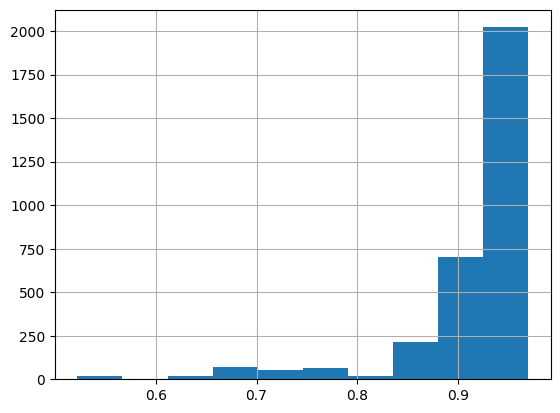

In [79]:
# bring out the scores that are lower than 0.8
df_2 = df[df['result_score'] < 1]
print(df_2)
display(df_2.columns)
df_2.result_score.hist()

In [80]:
df_2

,x,y,imb_id,num_voie,cp_no_voie,type_voie,nom_voie,batiment,code_insee,code_poste,...,result_name,result_street,result_postcode,result_city,result_context,result_citycode,result_oldcitycode,result_oldcity,result_district,result_status
0,"55,29537709","-21,10220969",974230052K-14,14,NaN,Chemin,DES BOUGAINVILLIERS,NaN,97423,97426,...,14 Chemin des Bougainvilliers,Chemin des Bougainvilliers,97426,Les Trois-Bassins,"974, La Réunion",97423,NaN,NaN,NaN,ok
1,"55,26989903","-21,12715215",974230027H-7,7,NaN,Chemin,DES BANANIERS,NaN,97423,97426,...,7 Allée des Bananiers,Allée des Bananiers,97426,Les Trois-Bassins,"974, La Réunion",97423,NaN,NaN,NaN,ok
2,"55,26994391","-21,12743262",974230027H-8,8,NaN,Chemin,DES BANANIERS,NaN,97423,97426,...,8 Allée des Bananiers,Allée des Bananiers,97426,Les Trois-Bassins,"974, La Réunion",97423,NaN,NaN,NaN,ok
3,"55,27003389","-21,1271445",974230027H-9,9,NaN,Chemin,DES BANANIERS,NaN,97423,97426,...,9 Allée des Bananiers,Allée des Bananiers,97426,Les Trois-Bassins,"974, La Réunion",97423,NaN,NaN,NaN,ok
4,"55,29977399","-21,11425813",974230028J-1,1,NaN,Chemin,DES BAMBOUS,NaN,97423,97426,...,1 Chemin des Bambous,Chemin des Bambous,97426,Les Trois-Bassins,"974, La Réunion",97423,NaN,NaN,NaN,ok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3174,"55,27075112","-21,12753119",974230027H-20,20,NaN,Chemin,DES BANANIERS,NaN,97423,97426,...,Allée des Bananiers,Allée des Bananiers,97426,Les Trois-Bassins,"974, La Réunion",97423,NaN,NaN,NaN,ok
3175,"55,26948305","-21,12727436",974230027H-3,3,NaN,Chemin,DES BANANIERS,NaN,97423,97426,...,3 Allée des Bananiers,Allée des Bananiers,97426,Les Trois-Bassins,"974, La Réunion",97423,NaN,NaN,NaN,ok
3176,"55,26956591","-21,12760037",974230027H-4,4,NaN,Chemin,DES BANANIERS,NaN,97423,97426,...,4 Allée des Bananiers,Allée des Bananiers,97426,Les Trois-Bassins,"974, La Réunion",97423,NaN,NaN,NaN,ok
3177,"55,26967701","-21,12720408",974230027H-5,5,NaN,Chemin,DES BANANIERS,NaN,97423,97426,...,5 Allée des Bananiers,Allée des Bananiers,97426,Les Trois-Bassins,"974, La Réunion",97423,NaN,NaN,NaN,ok


In [81]:
#get only the 1st word of the 'result_street' column
df_2['type_result'] = df_2['result_street'].str.split(' ').str[0]

print(df_2['type_result'])
#prélève que les noms de voies de la colonne 'result_street' en enlevant les types de voies dans ce nom

df_2['result_street'] = df_2['result_street'].str.split(' ').str[1:].str.join(' ')

df_2['result_street']


#take off the type of street in the 'result_street' column


0       Chemin
1        Allée
2        Allée
3        Allée
4       Chemin
         ...  
3174     Allée
3175     Allée
3176     Allée
3177     Allée
3178     Allée
Name: type_result, Length: 3179, dtype: object


0       des Bougainvilliers
1             des Bananiers
2             des Bananiers
3             des Bananiers
4               des Bambous
               ...         
3174          des Bananiers
3175          des Bananiers
3176          des Bananiers
3177          des Bananiers
3178          des Bananiers
Name: result_street, Length: 3179, dtype: object

In [82]:
# create a dataframe with only the matching results with the column 'result_street' and 'nom_voie' not caring about the case
df_3 = df_2[df_2['result_street'].str.lower() == df_2['nom_voie'].str.lower()]
df_3
df_wrong = df_2[df_2['result_street'].str.lower() != df_2['nom_voie'].str.lower()]
#display all df_wrong


#write df_wrong in a csv file but only the columns 'nom_voie', 'result_street', 'result_score', 'result_type', 'result_status', taking off the duplicated names in the 'nom_voie' column
df_wrong.drop_duplicates(subset='result_street').to_csv('wrong.csv', columns=['nom_voie', 'type_result' ,'result_street', 'result_score', 'result_type', 'result_status'], sep=';')
#df_wrong.drop_duplicates(subset='result_street').to_csv('wrong.csv', columns=['nom_voie','result_street', 'result_score', 'result_type', 'result_status'], sep=';')
df_wrong_names = pd.read_csv('wrong.csv', delimiter=';')

df_wrong_names


,Unnamed: 0,nom_voie,type_result,result_street,result_score,result_type,result_status
0,31,DES BARRIERES,Chemin,des Barrières,0.966260,housenumber,ok
1,299,BENARD,Chemin,Bénard,0.956273,housenumber,ok
2,369,DES BRINGELIERS,Rue,des Bringéliers,0.959886,housenumber,ok
3,424,DES CAMELIAS,Allée,des Camélias,0.956880,housenumber,ok
4,524,DU CIMETIERE,Rue,du Cimetière,0.960812,housenumber,ok
5,549,DU CHATEAU D'EAU,Rue,du Château d'Eau,0.764443,housenumber,ok
6,614,DES CYPRES,Allée,des Cyprès,0.957155,housenumber,ok
7,659,DE L'ECOLE DU BOIS DE NEFL,Chemin,de l'École du Bois de Nèfles,0.902506,housenumber,ok
8,695,DES ECOLIERS,Chemin,des Écoliers,0.956586,housenumber,ok
9,707,DE L EGLISE,Rue,de l'Église,0.951593,housenumber,ok


Alors d'après ce tableau ci-dessus, on repère des erreurs communs :
- Le plus commun c'est **l'utilisation des majuscules partout** qui __enlève toutes les accents__. _Pas très grave pour reconnaitre la voie_.
- Des erreurs plus flagrantes sont dissimulées dans le fichier ZEOP comme des fautes d'ortographes, de frappes ou même encore des mauvais noms : 
  - DE L'ECOLE DU BOIS DE NEFL	-> de l'École du Bois de Nèfles
  - POINSETIAS -> Poinsettias
  - DES PAILLE EN QUEUE -> des Pailles En Queue
  - LOT AGRICOLE COCAT	-> Cocat Lotissement Horyzon Bleu
  - CALUMETS -> les Calumets
  - DES JASMINS	-> des Lys **[very wrong here, doesn't exists in the BAN file]**
  - GERBERAS - CHEMIN DES BARRIERES -> des Barrières - Lotissement Les Gerberas	
  - ARMANETTES -> Armanet
  - DES ALAMANDAS	-> des Allamandas
  - DES GRENADIERS -> des Bananiers	**[very wrong here, still exists in the BAN file]**
- Ensuite, on a le manque d'apostrophe sur deux noms : "L ALBATROS" et "DE L EGLISE".
- des manques de tiret : "DES TUITS TUITS" -> "des Tuits-Tuits" || "DES TECS TECS" -> "des Tecs-tecs"
  

In [83]:
df_wrong_names['is_in_ban'] = df_wrong_names['result_street'].apply(
    lambda x: any(x.lower() in nom_voie.lower() for nom_voie in df_ban['nom_voie'])
)

# Display the result
print(df_wrong_names[['result_street', 'is_in_ban']])

# display the names of the streets that are in the BAN
df_wrong_names[df_wrong_names['is_in_ban'] == False]

                               result_street  is_in_ban
0                              des Barrières       True
1                                     Bénard       True
2                            des Bringéliers       True
3                               des Camélias       True
4                               du Cimetière       True
5                           du Château d'Eau       True
6                                 des Cyprès       True
7               de l'École du Bois de Nèfles       True
8                               des Écoliers       True
9                                de l'Église       True
10                                   Florébo       True
11                              des Fougères       True
12                          François de Mahy       True
13                            des Francicéas       True
14                      du Général de Gaulle       True
15                             des Géraniums       True
16                               Hervé Payet    

,Unnamed: 0,nom_voie,type_result,result_street,result_score,result_type,result_status,is_in_ban
36,2719,DES JASMINS,Impasse,des Lys,0.724164,street,ok,False
37,2722,GERBERAS - CHEMIN DES BARRIERES,Chemin,des Barrières - Lotissement Les Gerberas,0.909426,housenumber,ok,False


Après vérification des 2 noms de voie, L'impasse des lys et le lotissement "Les Gerberas" ne sont pas certifié dans Les 3 Bassins.\

Donc après recherche des ces 2 noms de rues, le lotissement "Les Gerberas" existe bien dans les 3 bassins, MAIS l'impasse Des Lys n'existe pas aux 3 bassins!! Donc nous pouvons en conclure que les noms qui sont **totalement incorrectes** dans Zeop, d'où le Géocode donne une rue qui **n'existe pas non plus** aux Trois Bassins, l'erreur est **total et grave**.\
C'est des cas absurdes à supprimer dans la base de donnée de Zeop.


Another update : nous avons découvert que chaque numéro de cette impasse correspondait à un emplacement d'une maison, d'après la correspondance entre les locations long-lat. Là la seule solution afin de régler cette erreur est de récuperer l'addresse la plus proche des locations données dans le fichier Zeop, depuis le fichier BAN.

In [84]:
# Convert columns to string, replace commas with dots, and convert to float
df_2['x'] = df_2['x'].astype(str).str.replace(',', '.').astype(float)
df_2['y'] = df_2['y'].astype(str).str.replace(',', '.').astype(float)
df_ban['lat'] = df_ban['lat'].astype(str).str.replace(',', '.').astype(float)
df_ban['lon'] = df_ban['lon'].astype(str).str.replace(',', '.').astype(float)

# Filtrer le dataframe ZEOP pour le nom de voie "DES JASMINS"
zeop_jasmins = df_2[df_2['nom_voie'].str.lower() == 'des jasmins']



def find_closest_address(row, df_ban): #row est une ligne du dataframe zeop_jasmins, df_ban est le dataframe des ad
    zeop_coords = (row['y'], row['x'])
    df_ban['distance'] = df_ban.apply(lambda x: geodesic(zeop_coords, (x['lat'], x['lon'])).meters, axis=1)
    closest_address = df_ban.loc[df_ban['distance'].idxmin()]
    return {
        'closest_lat': closest_address['lat'],
        'closest_lon': closest_address['lon'],
        'distance': closest_address['distance'],
        'address': closest_address.get('address', 'Unknown')  # Ensure 'address' key exists
    }

# Appliquer la fonction find_closest_address à chaque ligne du dataframe ZEOP
zeop_jasmins['closest_address'] = zeop_jasmins.apply(lambda x: find_closest_address(x, df_ban), axis=1)

display(zeop_jasmins)

# Extraire les informations d'adresse à partir des coordonnées les plus proches
def get_real_address(row, df_ban): #row est une ligne du dataframe zeop_jasmins, df_ban est le dataframe des adresses BAN
    closest_lat = row['closest_address']['closest_lat']
    closest_lon = row['closest_address']['closest_lon']
    real_address = df_ban[(df_ban['lat'] == closest_lat) & (df_ban['lon'] == closest_lon)]
    if not real_address.empty:
        return {
            'numero': real_address.iloc[0].get('numero', 'Unknown'),
            'nom_voie': real_address.iloc[0].get('nom_voie', 'Unknown')
        }
    return {'numero': 'Unknown', 'nom_voie': 'Unknown'}

# Ajouter les informations d'adresse réelle au dataframe zeop_jasmins
zeop_jasmins['real_address'] = zeop_jasmins.apply(lambda x: get_real_address(x, df_ban), axis=1)

display(zeop_jasmins)



C:\Users\mvitr\AppData\Local\Temp\ipykernel_46196\239191261.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zeop_jasmins['closest_address'] = zeop_jasmins.apply(lambda x: find_closest_address(x, df_ban), axis=1)


,x,y,imb_id,num_voie,cp_no_voie,type_voie,nom_voie,batiment,code_insee,code_poste,...,result_postcode,result_city,result_context,result_citycode,result_oldcitycode,result_oldcity,result_district,result_status,type_result,closest_address
2719,55.299477,-21.103967,97423ZZ25Z-1,1,NaN,Impasse,DES JASMINS,NaN,97423,97426,...,97426,Les Trois-Bassins,"974, La Réunion",97423,NaN,NaN,NaN,ok,Impasse,"{'closest_lat': -21.103958, 'closest_lon': 55...."
2720,55.299294,-21.103938,97423ZZ25Z-3,3,NaN,Impasse,DES JASMINS,NaN,97423,97426,...,97426,Les Trois-Bassins,"974, La Réunion",97423,NaN,NaN,NaN,ok,Impasse,"{'closest_lat': -21.104007, 'closest_lon': 55...."
2721,55.299121,-21.104000,97423ZZ25Z-4,4,NaN,Impasse,DES JASMINS,NaN,97423,97426,...,97426,Les Trois-Bassins,"974, La Réunion",97423,NaN,NaN,NaN,ok,Impasse,"{'closest_lat': -21.103997, 'closest_lon': 55...."


C:\Users\mvitr\AppData\Local\Temp\ipykernel_46196\239191261.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zeop_jasmins['real_address'] = zeop_jasmins.apply(lambda x: get_real_address(x, df_ban), axis=1)


,x,y,imb_id,num_voie,cp_no_voie,type_voie,nom_voie,batiment,code_insee,code_poste,...,result_city,result_context,result_citycode,result_oldcitycode,result_oldcity,result_district,result_status,type_result,closest_address,real_address
2719,55.299477,-21.103967,97423ZZ25Z-1,1,NaN,Impasse,DES JASMINS,NaN,97423,97426,...,Les Trois-Bassins,"974, La Réunion",97423,NaN,NaN,NaN,ok,Impasse,"{'closest_lat': -21.103958, 'closest_lon': 55....","{'numero': 62, 'nom_voie': 'Rue Georges Brasse..."
2720,55.299294,-21.103938,97423ZZ25Z-3,3,NaN,Impasse,DES JASMINS,NaN,97423,97426,...,Les Trois-Bassins,"974, La Réunion",97423,NaN,NaN,NaN,ok,Impasse,"{'closest_lat': -21.104007, 'closest_lon': 55....","{'numero': 68, 'nom_voie': 'Rue Georges Brasse..."
2721,55.299121,-21.104000,97423ZZ25Z-4,4,NaN,Impasse,DES JASMINS,NaN,97423,97426,...,Les Trois-Bassins,"974, La Réunion",97423,NaN,NaN,NaN,ok,Impasse,"{'closest_lat': -21.103997, 'closest_lon': 55....","{'numero': 23, 'nom_voie': 'Allée des Lilas'}"


Found it! Nous avons pu trouvé les addresses correspondant aux mega erreurs via les locations longitudes et latitudes!

Anyway, nous devons juste flaguer les erreurs de fautes de frappes, d'orthographes et de noms incorrectes 

In [85]:
from unidecode import unidecode

# create a dataframe with only the matching results with the column 'result_street' and 'nom_voie' not caring about the case
df_3 = df_2[df_2['result_street'].str.lower() == df_2['nom_voie'].str.lower()]
df_3
df_wrong = df_2[df_2['result_street'].str.lower() != df_2['nom_voie'].str.lower()]

# Remove accents for comparison
df_wrong['result_street_no_accents'] = df_wrong['result_street'].apply(unidecode).str.lower()
df_wrong['nom_voie_no_accents'] = df_wrong['nom_voie'].apply(unidecode).str.lower()

# Filter out rows where the only difference is the accent
df_wrong_no_accents = df_wrong[df_wrong['result_street_no_accents'] != df_wrong['nom_voie_no_accents']]

# Write df_wrong_no_accents to a csv file but only the columns 'nom_voie', 'result_street', 'result_score', 'result_type', 'result_status', taking off the duplicated names in the 'nom_voie' column
df_wrong_no_accents.drop_duplicates(subset='result_street').to_csv('wrong_no_accents.csv', columns=['nom_voie', 'type_result', 'result_street', 'result_score', 'result_type', 'result_status'], sep=';')

df_wrong_names_no_accents = pd.read_csv('wrong_no_accents.csv', delimiter=';')

df_wrong_names_no_accents

C:\Users\mvitr\AppData\Local\Temp\ipykernel_46196\3018985522.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wrong['result_street_no_accents'] = df_wrong['result_street'].apply(unidecode).str.lower()
C:\Users\mvitr\AppData\Local\Temp\ipykernel_46196\3018985522.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wrong['nom_voie_no_accents'] = df_wrong['nom_voie'].apply(unidecode).str.lower()


,Unnamed: 0,nom_voie,type_result,result_street,result_score,result_type,result_status
0,659,DE L'ECOLE DU BOIS DE NEFL,Chemin,de l'École du Bois de Nèfles,0.902506,housenumber,ok
1,707,DE L EGLISE,Rue,de l'Église,0.951593,housenumber,ok
2,1893,DES POINSETIAS,Chemin,des Poinsettias,0.865129,street,ok
3,2425,NATIONALE 1 A,Route,Nationale 1a,0.840146,street,ok
4,2478,DES TUITS TUITS,Allée,des Tuits-Tuits,0.957661,housenumber,ok
5,2521,DES PAILLE EN QUEUE,Impasse,des Pailles En Queue,0.903224,housenumber,ok
6,2606,DES GRENADIERS,Allée,des Bananiers,0.758115,housenumber,ok
7,2685,LOT AGRICOLE COCAT,Rue,Cocat Lotissement Horyzon Bleu,0.543363,housenumber,ok
8,2710,CALUMETS,Lotissement,les Calumets,0.887579,housenumber,ok
9,2719,DES JASMINS,Impasse,des Lys,0.724164,street,ok


In [88]:
# Define a function to check for errors
def check_for_errors(row, df_wrong_names_no_accents):
    if row['nom_voie'] in df_wrong_names_no_accents['nom_voie'].values:
        return True, 'Mauvais nom de voie ou faute'
    else:
        return False, None

# Apply the function to the df_zeop dataframe
df_zeop[['error', 'error_type']] = df_zeop.apply(lambda row: check_for_errors(row, df_wrong_names_no_accents), axis=1, result_type='expand')

# Display the updated dataframe
display(df_zeop.loc[df_zeop['nom_voie'] == 'DES JASMINS'])
df_zeop.head()

,x,y,imb_id,num_voie,cp_no_voie,type_voie,nom_voie,batiment,code_insee,code_poste,...,imb_etat,pm_ref,pm_etat,code_l331,geom_mod,type_imb,date_completude,date_completude_manquante,error,error_type
2719,55.299477,-21.103967,97423ZZ25Z-1,1,NaN,Impasse,DES JASMINS,NaN,97423,97426,...,deploye,RU-97423-TBIA,deploye,REUN,f,PA,2017-08-03,f,True,Mauvais nom de voie ou faute
2720,55.299294,-21.103938,97423ZZ25Z-3,3,NaN,Impasse,DES JASMINS,NaN,97423,97426,...,deploye,RU-97423-TBIA,deploye,REUN,f,PA,2017-08-03,f,True,Mauvais nom de voie ou faute
2721,55.299121,-21.104000,97423ZZ25Z-4,4,NaN,Impasse,DES JASMINS,NaN,97423,97426,...,deploye,RU-97423-TBIA,deploye,REUN,f,PA,2017-08-03,f,True,Mauvais nom de voie ou faute


,x,y,imb_id,num_voie,cp_no_voie,type_voie,nom_voie,batiment,code_insee,code_poste,...,imb_etat,pm_ref,pm_etat,code_l331,geom_mod,type_imb,date_completude,date_completude_manquante,error,error_type
0,55.295377,-21.102210,974230052K-14,14,NaN,Chemin,DES BOUGAINVILLIERS,NaN,97423,97426,...,deploye,RU-97423-TBIA,deploye,REUN,f,PA,2017-08-03,f,False,None
1,55.269899,-21.127152,974230027H-7,7,NaN,Chemin,DES BANANIERS,NaN,97423,97426,...,deploye,RU-97423-TBBA,deploye,REUN,f,PA,2018-10-18,f,False,None
2,55.269944,-21.127433,974230027H-8,8,NaN,Chemin,DES BANANIERS,NaN,97423,97426,...,deploye,RU-97423-TBBA,deploye,REUN,f,PA,2018-10-18,f,False,None
3,55.270034,-21.127144,974230027H-9,9,NaN,Chemin,DES BANANIERS,NaN,97423,97426,...,deploye,RU-97423-TBBA,deploye,REUN,f,PA,2018-10-18,f,False,None
4,55.299774,-21.114258,974230028J-1,1,NaN,Chemin,DES BAMBOUS,NaN,97423,97426,...,deploye,RU-97423-TBKA,deploye,REUN,f,PA,2022-01-17,f,False,None


Ici, nous avons pu mettre une colonne 'error' de type Booléen pour flaguer si il y a une erreur ou pas dans le dataframe. En plus, nous avons pu marquer où est l'erreur. Mettons-le dans un fichier csv.

In [87]:
#put the zeop dataframe in a csv file
df_zeop.to_csv('zeop_with_errors.csv', sep=';')